# Sur-echantillonage : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Dataframe
dataset =pd.read_csv('trans_cleaned_df.csv')


In [3]:
#faire une copie 
df = dataset.copy()

# smote

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split


from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [5]:
X = df.drop(['isFraud'], axis = 1)
y = df[['isFraud']]

In [6]:
# Diviser l'ensemble d'entraînement en ensembles d'entraînement, de validation et de test

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [7]:
from imblearn.over_sampling import SMOTE

# Using SMOTE to oversample the dataset

sm = SMOTE(random_state=4)
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
print(y.isFraud.value_counts())
print(y_smote.isFraud.value_counts())


isFraud
0    619349
1      8939
Name: count, dtype: int64
isFraud
0    619349
1    619349
Name: count, dtype: int64


In [8]:
y_smote.head()

,isFraud
0,0
1,0
2,0
3,0
4,0


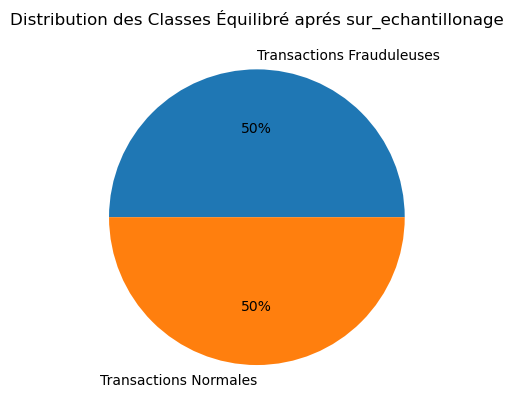

In [9]:
# Afficher la distribution équilibré de du nouvel ensemble de données en comembaire : 

plt.pie(y_smote.value_counts(),
labels=['Transactions Frauduleuses', 'Transactions Normales'],
autopct='%1.0f%%')
        
plt.title('Distribution des Classes Équilibré aprés sur_echantillonage')
plt.show()

In [10]:
# Entrainnement et Validation : 

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix


In [12]:
X_sm = X_smote
y_sm = y_smote

In [13]:
from sklearn.model_selection import train_test_split

# Divisez les données suréchantillonnées en ensembles d'entraînement (70%), de validation (15%) et de test (15%)
X_sm_train, X_sm_temp, y_sm_train, y_sm_temp = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)
X_sm_val, X_sm_test, y_sm_val, y_sm_test = train_test_split(X_sm_temp, y_sm_temp, test_size=0.5, random_state=42)

# Affichez la taille de chaque ensemble
print("Train set shape:", X_sm_train.shape)
print("Validation set shape:", X_sm_val.shape)
print("Test set shape:", X_sm_test.shape)


Train set shape: (867088, 11)
Validation set shape: (185805, 11)
Test set shape: (185805, 11)


Decision Tree - Validation Set Metrics:
Accuracy: 0.9695379564597293
Precision: 0.9622960045019696
Recall: 0.9772587584511371
ROC AUC: 0.969551520501652
Confusion Matrix - Validation Set:
[[89515  3551]
 [ 2109 90630]]
________________________________

Decision Tree - Training Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
ROC AUC: 1.0
Confusion Matrix - Training Set:
[[433463      0]
 [     0 433625]]
________________________________

Decision Tree - Test Set Metrics:
Accuracy: 0.9709641828799009
Precision: 0.9656070593238358
Recall: 0.9767704468462656
ROC AUC: 0.9709590221734021


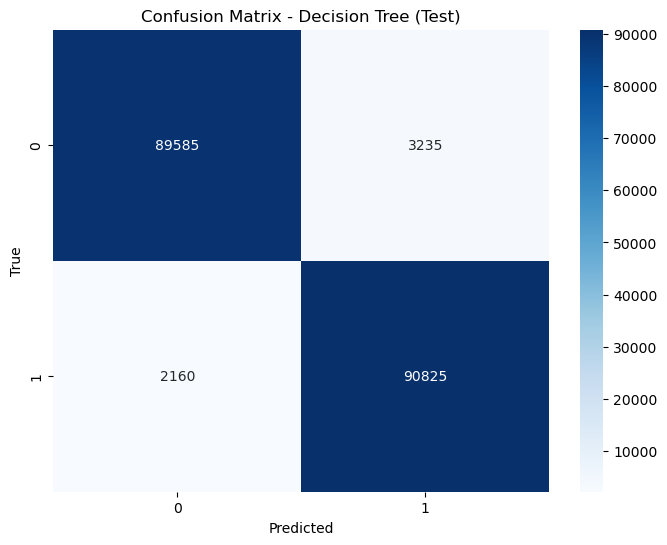

In [14]:
# Créer et entraîner un modèle Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_sm_train, y_sm_train)

# Valider le modèle sur l'ensemble de validation
y_sm_val_pred = model_dt.predict(X_sm_val)

# Évaluer les performances du modèle sur l'ensemble de validation
accuracy_val = accuracy_score(y_sm_val, y_sm_val_pred)
precision_val = precision_score(y_sm_val, y_sm_val_pred)
recall_val = recall_score(y_sm_val, y_sm_val_pred)
roc_auc_val = roc_auc_score(y_sm_val, y_sm_val_pred)

print("Decision Tree - Validation Set Metrics:")
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("ROC AUC:", roc_auc_val)

# Calculer la matrice de confusion pour l'ensemble de validation
confusion_matrix_val = confusion_matrix(y_sm_val, y_sm_val_pred)
print("Confusion Matrix - Validation Set:")
print(confusion_matrix_val)

print('________________________________')

# Prédire sur l'ensemble de training
y_sm_train_pred = model_dt.predict(X_sm_train)

# Évaluer les performances du modèle sur l'ensemble de training
accuracy_train = accuracy_score(y_sm_train, y_sm_train_pred)
precision_train = precision_score(y_sm_train, y_sm_train_pred)
recall_train = recall_score(y_sm_train, y_sm_train_pred)
roc_auc_train = roc_auc_score(y_sm_train, y_sm_train_pred)

print("\nDecision Tree - Training Set Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("ROC AUC:", roc_auc_train)

# Calculer la matrice de confusion pour l'ensemble de training
confusion_matrix_train = confusion_matrix(y_sm_train, y_sm_train_pred)
print("Confusion Matrix - Training Set:")
print(confusion_matrix_train)
print('________________________________')


# Prédire sur l'ensemble de test
y_sm_test_pred = model_dt.predict(X_sm_test)

# Évaluer les performances du modèle sur l'ensemble de test
accuracy_test_tree = accuracy_score(y_sm_test, y_sm_test_pred)
precision_test_tree = precision_score(y_sm_test, y_sm_test_pred)
recall_test_tree = recall_score(y_sm_test, y_sm_test_pred)
roc_auc_test_tree = roc_auc_score(y_sm_test, y_sm_test_pred)

print("\nDecision Tree - Test Set Metrics:")
print("Accuracy:", accuracy_test_tree)
print("Precision:", precision_test_tree)
print("Recall:", recall_test_tree)
print("ROC AUC:", roc_auc_test_tree)

# Afficher la matrice de confusion avec Seaborn
confusion_matrix_test = confusion_matrix(y_sm_test, y_sm_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - Decision Tree (Test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_15568\692736759.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_sm_train, y_sm_train)


Random Forest - Validation Set Metrics:
Accuracy: 0.9819488173084685
Precision: 0.9813979038981463
Recall: 0.9824561403508771
ROC AUC: 0.9819497085825905
Confusion Matrix - Validation Set:
[[91339  1727]
 [ 1627 91112]]
________________________________

Random Forest - Training Set Metrics:
Accuracy: 0.9999953868580813
Precision: 0.9999976938492654
Recall: 0.999993081579706
ROC AUC: 0.9999953872888622
Confusion Matrix - Training Set:
[[433462      1]
 [     3 433622]]
________________________________

Random Forest - Test Set Metrics:
Accuracy: 0.9815397863351363
Precision: 0.981235289692306
Recall: 0.9818895520782922
ROC AUC: 0.9815394754573749


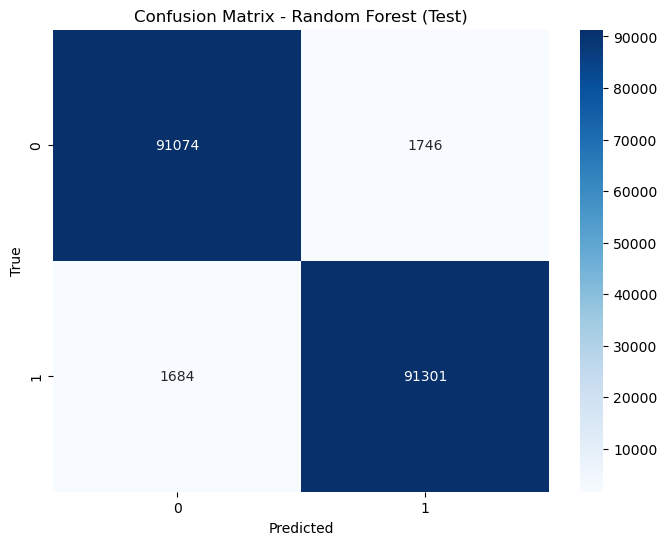

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Créer et entraîner un modèle Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_sm_train, y_sm_train)

# Valider le modèle sur l'ensemble de validation
y_sm_val_pred_rf = model_rf.predict(X_sm_val)

# Évaluer les performances du modèle sur l'ensemble de validation
accuracy_val_rf = accuracy_score(y_sm_val, y_sm_val_pred_rf)
precision_val_rf = precision_score(y_sm_val, y_sm_val_pred_rf)
recall_val_rf = recall_score(y_sm_val, y_sm_val_pred_rf)
roc_auc_val_rf = roc_auc_score(y_sm_val, y_sm_val_pred_rf)

print("Random Forest - Validation Set Metrics:")
print("Accuracy:", accuracy_val_rf)
print("Precision:", precision_val_rf)
print("Recall:", recall_val_rf)
print("ROC AUC:", roc_auc_val_rf)

# Calculer la matrice de confusion pour l'ensemble de validation
confusion_matrix_val_rf = confusion_matrix(y_sm_val, y_sm_val_pred_rf)
print("Confusion Matrix - Validation Set:")
print(confusion_matrix_val_rf)
print('________________________________')

# Prédire sur l'ensemble de training
y_sm_train_pred_rf = model_rf.predict(X_sm_train)

# Évaluer les performances du modèle sur l'ensemble de training
accuracy_train_rf = accuracy_score(y_sm_train, y_sm_train_pred_rf)
precision_train_rf = precision_score(y_sm_train, y_sm_train_pred_rf)
recall_train_rf = recall_score(y_sm_train, y_sm_train_pred_rf)
roc_auc_train_rf = roc_auc_score(y_sm_train, y_sm_train_pred_rf)

print("\nRandom Forest - Training Set Metrics:")
print("Accuracy:", accuracy_train_rf)
print("Precision:", precision_train_rf)
print("Recall:", recall_train_rf)
print("ROC AUC:", roc_auc_train_rf)

# Calculer la matrice de confusion pour l'ensemble de training
confusion_matrix_train_rf = confusion_matrix(y_sm_train, y_sm_train_pred_rf)
print("Confusion Matrix - Training Set:")
print(confusion_matrix_train_rf)
print('________________________________')

# Prédire sur l'ensemble de test
y_sm_test_pred_rf = model_rf.predict(X_sm_test)

# Évaluer les performances du modèle sur l'ensemble de test
accuracy_test_rf = accuracy_score(y_sm_test, y_sm_test_pred_rf)
precision_test_rf = precision_score(y_sm_test, y_sm_test_pred_rf)
recall_test_rf = recall_score(y_sm_test, y_sm_test_pred_rf)
roc_auc_test_rf = roc_auc_score(y_sm_test, y_sm_test_pred_rf)

print("\nRandom Forest - Test Set Metrics:")
print("Accuracy:", accuracy_test_rf)
print("Precision:", precision_test_rf)
print("Recall:", recall_test_rf)
print("ROC AUC:", roc_auc_test_rf)

# Afficher la matrice de confusion avec Seaborn pour l'ensemble de test
confusion_matrix_test_rf = confusion_matrix(y_sm_test, y_sm_test_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_rf, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - Random Forest (Test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


XGBoost - Validation Set Metrics:
Accuracy: 0.9247544468663383
Precision: 0.9390763329839663
Recall: 0.9081616148545919
ROC AUC: 0.924725296284666
Confusion Matrix - Validation Set:
[[87602  5464]
 [ 8517 84222]]
________________________________

XGBoost - Training Set Metrics:
Accuracy: 0.927182708098832
Precision: 0.9414583809959582
Recall: 0.9110429518593255
ROC AUC: 0.927185724089252
Confusion Matrix - Training Set:
[[408898  24565]
 [ 38574 395051]]
________________________________

XGBoost - Test Set Metrics:
Accuracy: 0.9247167729608998
Precision: 0.9404922548483868
Recall: 0.9069527343119858
ROC AUC: 0.9247325619415995


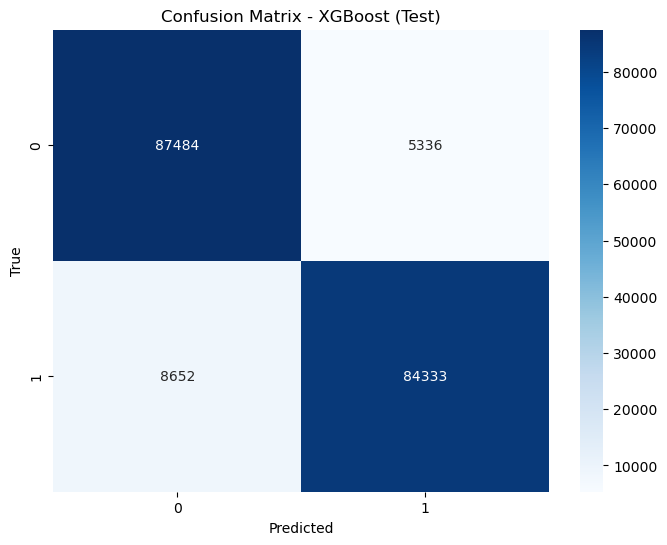

In [16]:
from xgboost import XGBClassifier


# Créer et entraîner un modèle XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X_sm_train, y_sm_train)

# Valider le modèle sur l'ensemble de validation
y_sm_val_pred_xgb = model_xgb.predict(X_sm_val)

# Évaluer les performances du modèle sur l'ensemble de validation
accuracy_val_xgb = accuracy_score(y_sm_val, y_sm_val_pred_xgb)
precision_val_xgb = precision_score(y_sm_val, y_sm_val_pred_xgb)
recall_val_xgb = recall_score(y_sm_val, y_sm_val_pred_xgb)
roc_auc_val_xgb = roc_auc_score(y_sm_val, y_sm_val_pred_xgb)

print("XGBoost - Validation Set Metrics:")
print("Accuracy:", accuracy_val_xgb)
print("Precision:", precision_val_xgb)
print("Recall:", recall_val_xgb)
print("ROC AUC:", roc_auc_val_xgb)

# Calculer la matrice de confusion pour l'ensemble de validation
confusion_matrix_val_xgb = confusion_matrix(y_sm_val, y_sm_val_pred_xgb)
print("Confusion Matrix - Validation Set:")
print(confusion_matrix_val_xgb)
print('________________________________')

# Prédire sur l'ensemble de training
y_sm_train_pred_xgb = model_xgb.predict(X_sm_train)

# Évaluer les performances du modèle sur l'ensemble de training
accuracy_train_xgb = accuracy_score(y_sm_train, y_sm_train_pred_xgb)
precision_train_xgb = precision_score(y_sm_train, y_sm_train_pred_xgb)
recall_train_xgb = recall_score(y_sm_train, y_sm_train_pred_xgb)
roc_auc_train_xgb = roc_auc_score(y_sm_train, y_sm_train_pred_xgb)

print("\nXGBoost - Training Set Metrics:")
print("Accuracy:", accuracy_train_xgb)
print("Precision:", precision_train_xgb)
print("Recall:", recall_train_xgb)
print("ROC AUC:", roc_auc_train_xgb)

# Calculer la matrice de confusion pour l'ensemble de training
confusion_matrix_train_xgb = confusion_matrix(y_sm_train, y_sm_train_pred_xgb)
print("Confusion Matrix - Training Set:")
print(confusion_matrix_train_xgb)
print('________________________________')

# Prédire sur l'ensemble de test
y_sm_test_pred_xgb = model_xgb.predict(X_sm_test)

# Évaluer les performances du modèle sur l'ensemble de test
accuracy_test_xgb = accuracy_score(y_sm_test, y_sm_test_pred_xgb)
precision_test_xgb = precision_score(y_sm_test, y_sm_test_pred_xgb)
recall_test_xgb = recall_score(y_sm_test, y_sm_test_pred_xgb)
roc_auc_test_xgb = roc_auc_score(y_sm_test, y_sm_test_pred_xgb)

print("\nXGBoost - Test Set Metrics:")
print("Accuracy:", accuracy_test_xgb)
print("Precision:", precision_test_xgb)
print("Recall:", recall_test_xgb)
print("ROC AUC:", roc_auc_test_xgb)

# Afficher la matrice de confusion avec Seaborn pour l'ensemble de test
confusion_matrix_test_xgb = confusion_matrix(y_sm_test, y_sm_test_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_xgb, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - XGBoost (Test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [17]:
 #Evaluation des trois modéles :



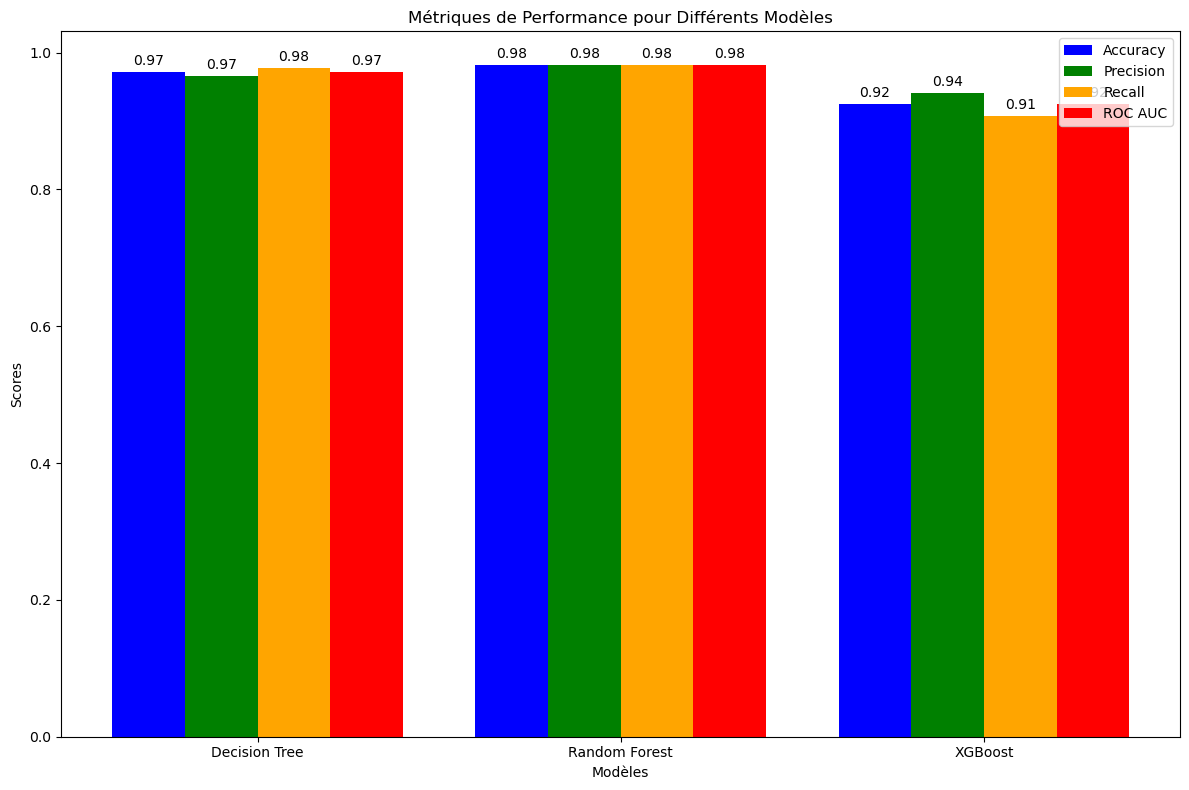

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Noms des modèles
model_names = ['Decision Tree', 'Random Forest', 'XGBoost']

# Métriques pour chaque modèle (remplacez les valeurs par les métriques réelles)
accuracies = [accuracy_test_tree, accuracy_test_rf, accuracy_test_xgb]
precisions = [precision_test_tree, precision_test_rf, precision_test_xgb]
recalls = [recall_test_tree, recall_test_rf, recall_test_xgb]
roc_auc_scores = [roc_auc_test_tree, roc_auc_test_rf, roc_auc_test_xgb]

# Créez un tableau de 1 sous-graphique
fig, ax = plt.subplots(figsize=(12, 8))

# Largeur des barres
bar_width = 0.2

# Positions des barres sur l'axe des x
index = np.arange(len(model_names))

# Créez les barres pour chaque métrique
bar1 = ax.bar(index, accuracies, bar_width, label='Accuracy', color='blue')
bar2 = ax.bar(index + bar_width, precisions, bar_width, label='Precision', color='green')
bar3 = ax.bar(index + 2 * bar_width, recalls, bar_width, label='Recall', color='orange')
bar4 = ax.bar(index + 3 * bar_width, roc_auc_scores, bar_width, label='ROC AUC', color='red')

# Définissez les étiquettes des axes et la légende
ax.set_xlabel('Modèles')
ax.set_ylabel('Scores')
ax.set_title('Métriques de Performance pour Différents Modèles')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(model_names)
ax.legend()

# Affichez les valeurs au-dessus des barres
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('%.2f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

plt.tight_layout()  # Ajuster la disposition pour éviter que les étiquettes ne se chevauchent
plt.show()


In [19]:
# optimisation pour XGBoost

XGBoost - Cross-Validation Scores: [0.92316253 0.92275888 0.92179013 0.92179544 0.92250471]
Moyenne des scores de validation croisée: 0.9224023392037217

XGBoost - Validation Set Metrics:
Accuracy: 0.9247544468663383
Precision: 0.9390763329839663
Recall: 0.9081616148545919
ROC AUC: 0.924725296284666
Confusion Matrix - Validation Set:
[[87602  5464]
 [ 8517 84222]]
________________________________

XGBoost - Training Set Metrics:
Accuracy: 0.927182708098832
Precision: 0.9414583809959582
Recall: 0.9110429518593255
ROC AUC: 0.927185724089252
Confusion Matrix - Training Set:
[[408898  24565]
 [ 38574 395051]]
________________________________

XGBoost - Test Set Metrics:
Accuracy: 0.9247167729608998
Precision: 0.9404922548483868
Recall: 0.9069527343119858
ROC AUC: 0.9247325619415995


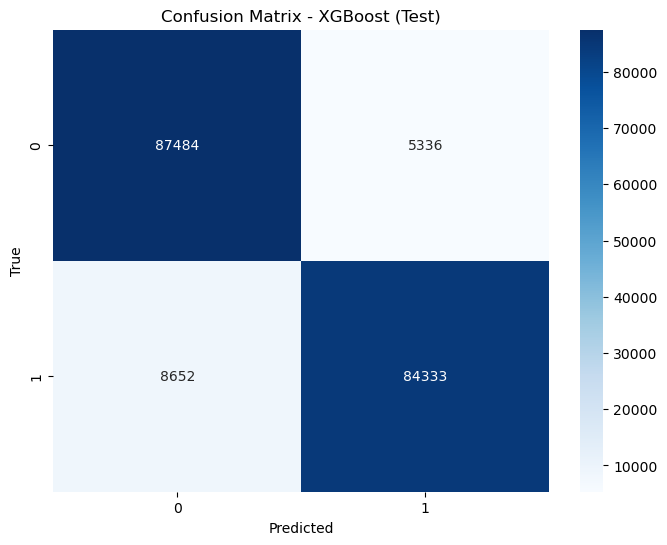

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np

# Créer et entraîner un modèle XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X_sm_train, y_sm_train)

# Effectuer une validation croisée (par exemple, avec 5 plis)
cv_scores = cross_val_score(model_xgb, X_sm_train, y_sm_train, cv=5, scoring='accuracy')

# Afficher les scores de validation croisée
print("XGBoost - Cross-Validation Scores:", cv_scores)
print("Moyenne des scores de validation croisée:", np.mean(cv_scores))

# Valider le modèle sur l'ensemble de validation
y_sm_val_pred_xgb = model_xgb.predict(X_sm_val)

# Évaluer les performances du modèle sur l'ensemble de validation
accuracy_val_xgb = accuracy_score(y_sm_val, y_sm_val_pred_xgb)
precision_val_xgb = precision_score(y_sm_val, y_sm_val_pred_xgb)
recall_val_xgb = recall_score(y_sm_val, y_sm_val_pred_xgb)
roc_auc_val_xgb = roc_auc_score(y_sm_val, y_sm_val_pred_xgb)

print("\nXGBoost - Validation Set Metrics:")
print("Accuracy:", accuracy_val_xgb)
print("Precision:", precision_val_xgb)
print("Recall:", recall_val_xgb)
print("ROC AUC:", roc_auc_val_xgb)

# Calculer la matrice de confusion pour l'ensemble de validation
confusion_matrix_val_xgb = confusion_matrix(y_sm_val, y_sm_val_pred_xgb)
print("Confusion Matrix - Validation Set:")
print(confusion_matrix_val_xgb)
print('________________________________')

# Prédire sur l'ensemble de training
y_sm_train_pred_xgb = model_xgb.predict(X_sm_train)

# Évaluer les performances du modèle sur l'ensemble de training
accuracy_train_xgb = accuracy_score(y_sm_train, y_sm_train_pred_xgb)
precision_train_xgb = precision_score(y_sm_train, y_sm_train_pred_xgb)
recall_train_xgb = recall_score(y_sm_train, y_sm_train_pred_xgb)
roc_auc_train_xgb = roc_auc_score(y_sm_train, y_sm_train_pred_xgb)

print("\nXGBoost - Training Set Metrics:")
print("Accuracy:", accuracy_train_xgb)
print("Precision:", precision_train_xgb)
print("Recall:", recall_train_xgb)
print("ROC AUC:", roc_auc_train_xgb)

# Calculer la matrice de confusion pour l'ensemble de training
confusion_matrix_train_xgb = confusion_matrix(y_sm_train, y_sm_train_pred_xgb)
print("Confusion Matrix - Training Set:")
print(confusion_matrix_train_xgb)
print('________________________________')

# Prédire sur l'ensemble de test
y_sm_test_pred_xgb = model_xgb.predict(X_sm_test)

# Évaluer les performances du modèle sur l'ensemble de test
accuracy_test_xgb = accuracy_score(y_sm_test, y_sm_test_pred_xgb)
precision_test_xgb = precision_score(y_sm_test, y_sm_test_pred_xgb)
recall_test_xgb = recall_score(y_sm_test, y_sm_test_pred_xgb)
roc_auc_test_xgb = roc_auc_score(y_sm_test, y_sm_test_pred_xgb)

print("\nXGBoost - Test Set Metrics:")
print("Accuracy:", accuracy_test_xgb)
print("Precision:", precision_test_xgb)
print("Recall:", recall_test_xgb)
print("ROC AUC:", roc_auc_test_xgb)

# Afficher la matrice de confusion avec Seaborn pour l'ensemble de test
confusion_matrix_test_xgb = confusion_matrix(y_sm_test, y_sm_test_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_xgb, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - XGBoost (Test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
# on ne peux plus perfectionner les prédiction de modele